In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# 1- Leitura dos Dados

In [2]:
mushroom_df = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
print(mushroom_df.shape)
mushroom_df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 2- Análise


2.1-Frequencia de cada label em cada feature

In [5]:

colunas = mushroom_df.columns
for c in colunas:
    df = (mushroom_df[c].value_counts()/mushroom_df[c].count()).to_frame().reset_index()
    fig = px.pie(df,values=c,names='index',title=c)
    fig.update_layout(title={'xanchor':'center'})
    fig.show()

Features muito unilaterais possivelmente não iram contribuir na classifição:
* ring-number
* veil-color
* veil-type
* gill-attachment
* gill-size
* ring_number

Boa proporção de classes na variavel predita.

2.2- Correlação entre as features

In [6]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


In [7]:
from dython.nominal import associations

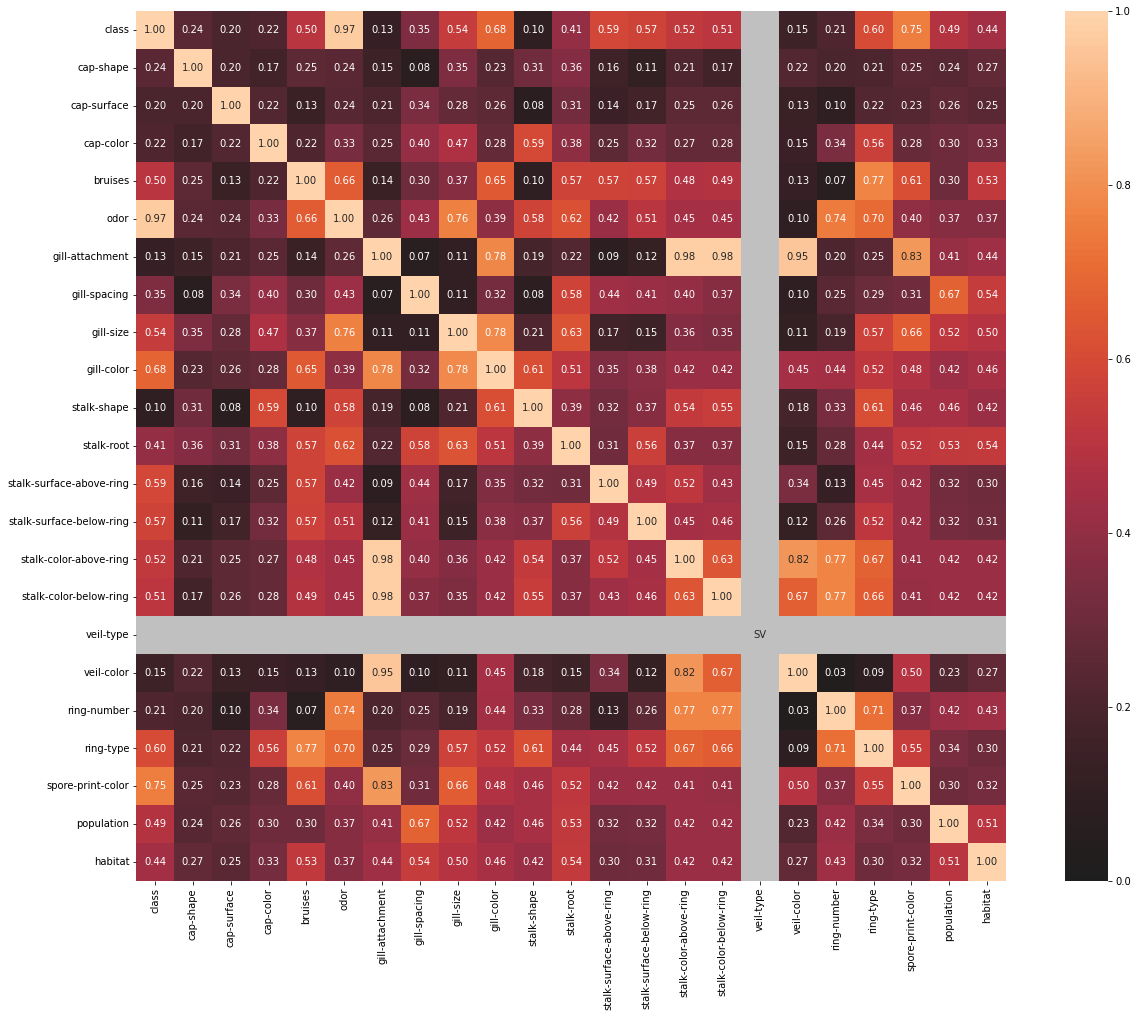

In [8]:
complete_correlation= associations(mushroom_df, filename= 'complete_correlation.png', figsize=(21,16))

In [9]:
df_corr = complete_correlation['corr']
feat_lin_corr = pd.DataFrame(np.tril(df_corr[(df_corr>0.75) & (df_corr<1)]),columns=df_corr.columns,index=df_corr.columns).fillna(0)
px.bar(feat_lin_corr,labels={'index':'Feature1','variable':'Feature2','value':'Correlação chi quadrado'})

Variáveis correlacionadas:
* class: {odor,spore-print-color}
* gill-attachment: {gill-color, stalk-color-above-ring, stalk-color-below-ring, veil-color, spore-print-color}
* stalk-color-below-ring: {ring-number}
* gill-size: {gill-color, odor}
* stalk-color-above-ring: {veil-color, ring-number}
* bruises: {ring-type}

As variaveis correlacionadas a feature *class* podem ser usadas em modelos simples como **classificação linear** e **logistica**, principalmente a feature *odor*.